In [16]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

df = pandas.read_csv('http://pogo.software/me4ml/xray.csv')
x = np.array(df['Distance (mm)'])
y = np.array(df['Total absorption'])

In [24]:
x_sum = sum(x)
x2_sum = sum(x**2)
x3_sum = sum(x**3)
x4_sum = sum(x**4)
x_y_sum = np.dot(x,y)
x2_y_sum = np.dot(x**2,y)
y_sum = sum (y)
m = len(x)
A = np.array([[x_sum, x2_sum],
              [m, x_sum]
              ])
b = np.array([x_y_sum, y_sum])

# Calcualte B from AB = b
B = np.linalg.solve(a = A, b = b)
X = np.linspace(0,6,200)
y_pred_linear = B[0] + B[1]*X

A = np.array([[x2_sum, x3_sum, x4_sum],
              [x_sum, x2_sum, x3_sum],
              [m, x_sum, x2_sum]
              ])
b = np.array([x2_y_sum, x_y_sum, y_sum])
# Calcualte B from AB = b
B = np.linalg.solve(a = A, b = b)
y_pred_quad = B[0] + B[1]*X + B[2]*X**2

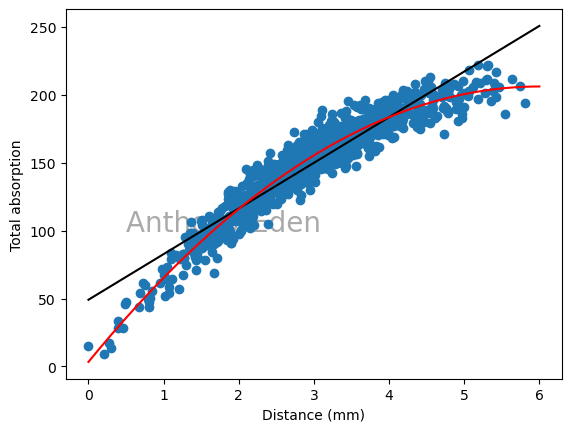

In [27]:
#Linear Regression Plot
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.text(0.5, 100, 'Anthony Eden', size = 20, zorder = 0, color = '#aaaaaa')
ax.plot(X,y_pred_linear, c ='black')
ax.set_xlabel('Distance (mm)')
ax.set_ylabel('Total absorption')

## Quadratic Regression Plot
ax.plot(X,y_pred_quad, c = 'red')